In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.densenet import DenseNet121
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
IMAGE_SIZE = [224, 224]

train_data_dir = 'gdrive/My Drive/Kaggle/data/train'
validation_data_dir = 'gdrive/My Drive/Kaggle/data/validation'

In [5]:
dense = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in dense.layers:
  layer.trainable = False

29089792/29084464 [==============================] - 0s 0us/step


In [6]:
folders = glob('gdrive/My Drive/Kaggle/data/train/*')
print(len(folders))

2


In [7]:
# our layers - you can add more if you want
x = Flatten()(dense.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
model = Model(inputs=dense.input, outputs=prediction)

In [10]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(validation_data_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2048 images belonging to 2 classes.
Found 832 images belonging to 2 classes.


In [13]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
64/64 [==============================] - 496s 8s/step - loss: 1.1338 - accuracy: 0.9185 - val_loss: 0.1609 - val_accuracy: 0.9784
Epoch 2/5
64/64 [==============================] - 394s 6s/step - loss: 0.1405 - accuracy: 0.9814 - val_loss: 0.1385 - val_accuracy: 0.9832
Epoch 3/5
64/64 [==============================] - 402s 6s/step - loss: 0.1872 - accuracy: 0.9780 - val_loss: 0.1628 - val_accuracy: 0.9832
Epoch 4/5
64/64 [==============================] - 401s 6s/step - loss: 0.0352 - accuracy: 0.9927 - val_loss: 0.1624 - val_accuracy: 0.9820
Epoch 5/5
64/64 [==============================] - 396s 6s/step - loss: 0.1088 - accuracy: 0.9849 - val_loss: 0.5735 - val_accuracy: 0.9615


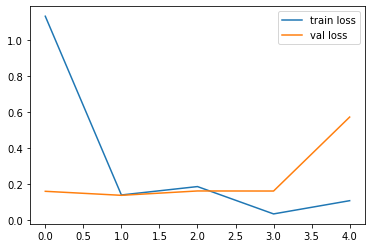

In [14]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

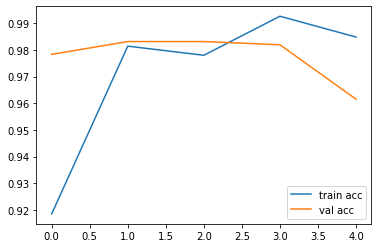

In [15]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()  